In [0]:
#To plot diagrams or visualizations
import matplotlib.pyplot as plt
#A python library for array operations
import numpy as np
#A python library for data analysis
import pandas as pd
#importing ensemble and gradient boosting model from python library sklearn
from sklearn.ensemble import GradientBoostingRegressor
#importing XGBClassifier model from python library xgboost
from xgboost import XGBClassifier
#importing SVM from python library sklearn
from sklearn import svm
#importing logistic regression from python library sklearn
from sklearn.linear_model import LogisticRegression
#importing RandomForestClassifier from python library sklearn
from sklearn.ensemble import RandomForestClassifier
#importing GaussianMixture model from python library sklearn
from sklearn.mixture import GaussianMixture
#For splitting data
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
#For scaling the data
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#gives you a single interface for all transformation and resulting estimator
from sklearn.pipeline import Pipeline

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=12Bl0Isr8-vUed7yWLv8z17l_2kQmz9qH' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

12Bl0Isr8-vUed7yWLv8z17l_2kQmz9qH


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv')
# Dataset is now stored in a Pandas Dataframe

In [0]:
df.head()

,age,sex,cp,tresp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [0]:
#For splitting data into dependent and independent data
X = df[['age', 'sex', 'cp', 'tresp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['num']


In [0]:
#For splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [0]:
#Apply GradientBoosting model on the data

model=GradientBoostingRegressor()
model=model.fit(X,y)
# print(model.score(np.nan_to_num(X),Y))
print(model.score(np.nan_to_num(X_train),y_train))
print(model.score(np.nan_to_num(X_test),y_test))

0.8933000966775845
0.9046502870567227


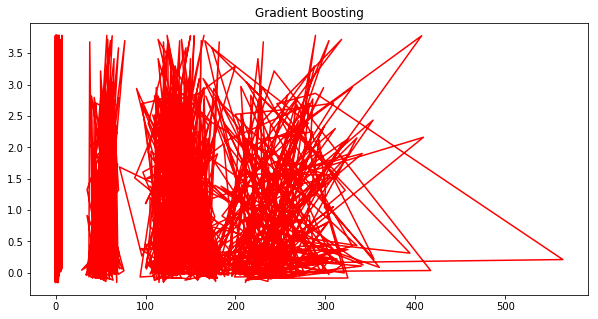

In [0]:
#To show the data from trained model
plt.figure(figsize=(10, 5))
plt.title("Gradient Boosting")
plt.plot(X, model.predict(X), color='r')
plt.show()

In [0]:
#To find accuracy of this model
accuracy = model.score(X_test,y_test)
print(accuracy*100)


90.46502870567227


In [0]:
#Apply Gaussian Naive Bayes model on the data
XGB = XGBClassifier()
XGB.fit(X_train,y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

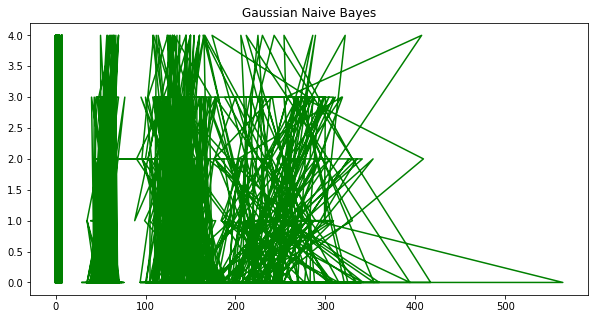

In [0]:
#To show the data from trained model
plt.figure(figsize=(10, 5))
plt.title("Gaussian Naive Bayes")
plt.plot(X, XGB.predict(X), color='g')
plt.show()

In [0]:
#To find accuracy of this model
accuracy = XGB.score(X_test,y_test)
print(accuracy*100)

54.91803278688525


In [0]:
#Logistic Regression
lr = LogisticRegression(penalty = 'l1')
lr.fit(X_train , y_train.values.ravel())
#print(model.score(np.nan_to_num(X),Y))
print(lr.score(np.nan_to_num(X_train),y_train))
print(lr.score(np.nan_to_num(X_test),y_test))

0.6795580110497238
0.5901639344262295


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


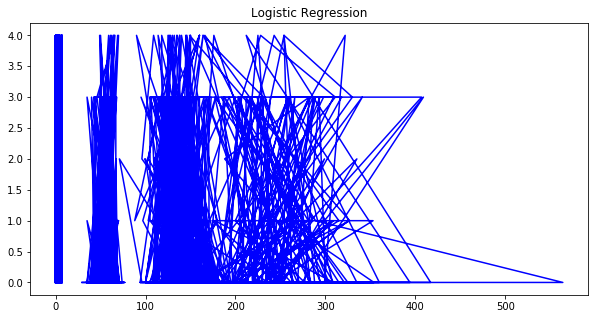

In [0]:
#To show the data from trained model
plt.figure(figsize=(10, 5))
plt.title("Logistic Regression")
plt.plot(X, lr.predict(X), color='b')
plt.show()

In [0]:
#To find accuracy of this model
accuracy = lr.score(X_test,y_test)
print(accuracy*100)

59.01639344262295


In [0]:
#SVM
sv = svm.SVC()
sv.fit(X_train , y_train.values.ravel())
print(sv.score(np.nan_to_num(X_train),y_train))
print(sv.score(np.nan_to_num(X_test),y_test))

1.0
0.5245901639344263


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


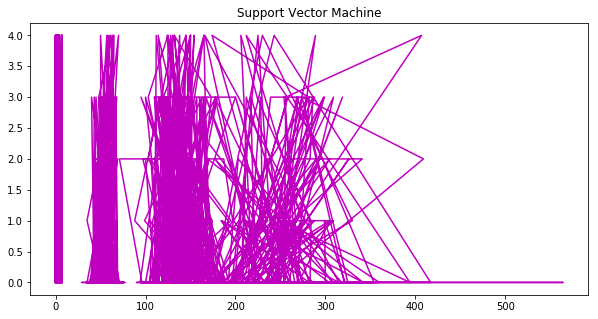

In [0]:
#To show the data from trained model
plt.figure(figsize=(10, 5))
plt.title("Support Vector Machine")
plt.plot(X, sv.predict(X), color='m')
plt.show()

In [0]:
#To find accuracy of this model
accuracy = sv.score(X_test,y_test)
print(accuracy*100)

52.459016393442624


In [0]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train , y_train.values.ravel())
print(rf.score(np.nan_to_num(X_train),y_train))
print(rf.score(np.nan_to_num(X_test),y_test))

0.6353591160220995
0.5737704918032787


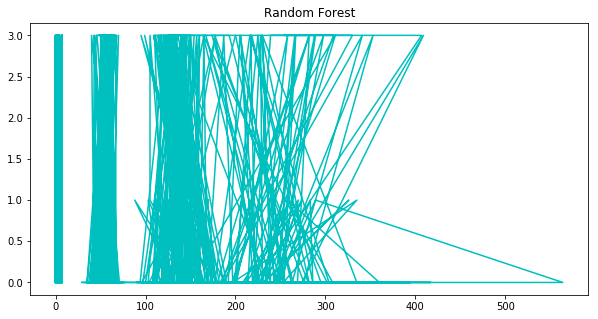

In [0]:
#To show the data from trained model
plt.figure(figsize=(10, 5))
plt.title("Random Forest")
plt.plot(X, rf.predict(X), color='c')
plt.show()

In [0]:
#To find accuracy of this model
accuracy = rf.score(X_test,y_test)
print(accuracy*100)

57.377049180327866


In [0]:
#Gaussian Mixture model
gmm = GaussianMixture()
gmm.fit(X_train,y_train.values.ravel())
print(gmm.score(np.nan_to_num(X_train),y_train))
print(gmm.score(np.nan_to_num(X_test),y_test))

-27.093420563987006
-27.372984576501256


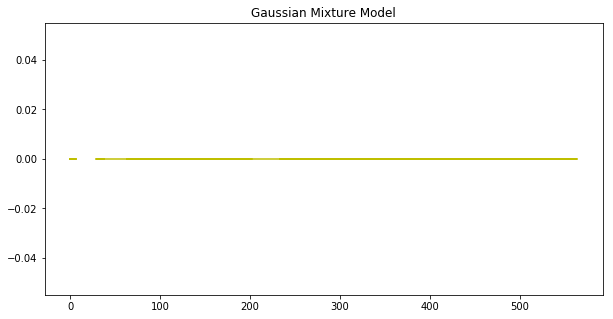

In [0]:
#To show the data from trained model
plt.figure(figsize=(10, 5))
plt.title("Gaussian Mixture Model")
plt.plot(X, gmm.predict(X), color='y')
plt.show()

In [0]:
#To find accuracy of this model
accuracy = gmm.score(X_test,y_test)
print(accuracy*100)

-2737.298457650126
